In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [6]:
f = open("data/FINAL_cleaned_output2.csv")
f.readline()
d = np.loadtxt(f, delimiter=",", usecols = (0, 1, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18))

In [7]:
d1 = pd.DataFrame(data=d)
d1.columns = ["index","rank","year","energy","liveness","tempo","speechiness","acousticness","instrumentalness","timesig","danceability","key","duration","loudness","valence"]
print d1.describe()

             index         rank         year       energy     liveness  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean    785.581961    50.503529  2007.360784     0.689639     0.177509   
std     467.099502    29.353723     4.660704     0.166659     0.135946   
min       0.000000     1.000000  2000.000000     0.000000     0.000000   
25%     375.500000    24.000000  2003.000000     0.584000     0.091450   
50%     784.000000    51.000000  2007.000000     0.709000     0.124000   
75%    1192.500000    76.000000  2011.000000     0.816500     0.225500   
max    1598.000000   100.000000  2015.000000     0.987000     0.854000   

             tempo  speechiness  acousticness  instrumentalness      timesig  \
count  1275.000000  1275.000000   1275.000000       1275.000000  1275.000000   
mean    120.049220     0.102606      0.156962          0.011252     3.979608   
std      28.680965     0.098737      0.199266          0.079046     0.276599   
min       0.0

In [8]:
x = pd.DataFrame(data=d1, columns=["energy", "liveness", "tempo", "speechiness", "acousticness", "instrumentalness", "danceability", "key", "loudness", "valence"]) 
y = pd.DataFrame(data=d1, columns=["rank"]) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Due to the non-boolean/non-binarized nature of the features, an array of threshold points must be passed into the BernoulliNB instance. These threshold points will be the mean values of each feature. For example, a song "has" the energy quality if its energy value is higher than the average energy of all songs in the data.

In [9]:
clf = BernoulliNB(binarize=[0.690180, 0.177648, 120.143451, 0.102686, 0.157085, 0.011261, 0.650279, 5.140502, 5.906388, 0.545966])
clf.fit(x_train, y_train)

/usr/lib/python2.7/dist-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0,
      binarize=[0.69018, 0.177648, 120.143451, 0.102686, 0.157085, 0.011261, 0.650279, 5.140502, 5.906388, 0.545966],
      class_prior=None, fit_prior=True)

Now to test on the test dataset.

In [20]:
#print "x_test.size = ", x_test.size
#print "y_test.size = ", y_test.size
#print len(x_test)
actual = list()
expected = list()
difference = list()
for idx in range(len(x_test)):
#for idx in range(x_test.size):
    #print idx
    actual.append(y_test.iloc[idx][0])
    expected.append(clf.predict(x_test[idx:idx+1])[0])
    difference.append(clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0])
    print "actual: ", y_test.iloc[idx][0], "expected: ", clf.predict(x_test[idx:idx+1])[0]
    print "prediction was ", (clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0]), " off"

actual:  6.0 expected:  81.0
prediction was  75.0  off
actual:  80.0 expected:  43.0
prediction was  -37.0  off
actual:  32.0 expected:  85.0
prediction was  53.0  off
actual:  60.0 expected:  30.0
prediction was  -30.0  off
actual:  16.0 expected:  73.0
prediction was  57.0  off
actual:  88.0 expected:  73.0
prediction was  -15.0  off
actual:  49.0 expected:  33.0
prediction was  -16.0  off
actual:  69.0 expected:  33.0
prediction was  -36.0  off
actual:  94.0 expected:  62.0
prediction was  -32.0  off
actual:  48.0 expected:  84.0
prediction was  36.0  off
actual:  42.0 expected:  73.0
prediction was  31.0  off
actual:  35.0 expected:  33.0
prediction was  -2.0  off
actual:  42.0 expected:  69.0
prediction was  27.0  off
actual:  55.0 expected:  87.0
prediction was  32.0  off
actual:  10.0 expected:  96.0
prediction was  86.0  off
actual:  70.0 expected:  16.0
prediction was  -54.0  off
actual:  52.0 expected:  96.0
prediction was  44.0  off
actual:  53.0 expected:  76.0
prediction w

actual:  90.0 expected:  96.0
prediction was  6.0  off
actual:  57.0 expected:  45.0
prediction was  -12.0  off
actual:  4.0 expected:  85.0
prediction was  81.0  off
actual:  36.0 expected:  87.0
prediction was  51.0  off
actual:  95.0 expected:  96.0
prediction was  1.0  off
actual:  43.0 expected:  98.0
prediction was  55.0  off
actual:  92.0 expected:  73.0
prediction was  -19.0  off
actual:  41.0 expected:  32.0
prediction was  -9.0  off
actual:  70.0 expected:  33.0
prediction was  -37.0  off
actual:  89.0 expected:  30.0
prediction was  -59.0  off
actual:  55.0 expected:  4.0
prediction was  -51.0  off
actual:  61.0 expected:  96.0
prediction was  35.0  off
actual:  67.0 expected:  32.0
prediction was  -35.0  off
actual:  9.0 expected:  30.0
prediction was  21.0  off
actual:  19.0 expected:  45.0
prediction was  26.0  off
actual:  43.0 expected:  18.0
prediction was  -25.0  off
actual:  86.0 expected:  85.0
prediction was  -1.0  off
actual:  18.0 expected:  7.0
prediction was  -

Now, let's visualize what we have so far.

<function matplotlib.pyplot.show>

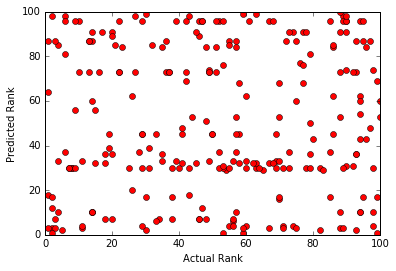

In [22]:
plt.plot(actual,expected,'ro')
plt.axis([0,100,0,100])
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.show

<function matplotlib.pyplot.show>

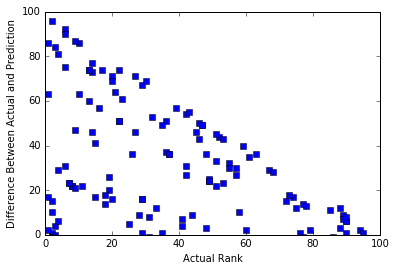

In [23]:
plt.plot(actual, difference,'bs')
plt.axis([0,100,0,100])
plt.xlabel('Actual Rank')
plt.ylabel('Difference Between Actual and Prediction')
plt.show

In [25]:
count = 0
for q in difference:
    if q == 0:
        count += 1
print "Accuracy of Predictions: ", (float(count)/float(len(difference)))*100, "%"

Accuracy of Predictions:  0.392156862745 %


Yeah, this looks basically random. I can't say that we can predict rank with all of the features as parameters at once. So let's try thinning out parameters!

#### Energy

In [26]:
x = pd.DataFrame(data=d1, columns=["energy"]) 
y = pd.DataFrame(data=d1, columns=["rank"]) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = BernoulliNB(binarize=[0.690180])
clf.fit(x_train, y_train)

/usr/lib/python2.7/dist-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=[0.69018], class_prior=None, fit_prior=True)

In [27]:
#print "x_test.size = ", x_test.size
#print "y_test.size = ", y_test.size
#print len(x_test)
actual = list()
expected = list()
difference = list()
for idx in range(len(x_test)):
#for idx in range(x_test.size):
    #print idx
    actual.append(y_test.iloc[idx][0])
    expected.append(clf.predict(x_test[idx:idx+1])[0])
    difference.append(clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0])
    print "actual: ", y_test.iloc[idx][0], "expected: ", clf.predict(x_test[idx:idx+1])[0]
    print "prediction was ", (clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0]), " off"

actual:  73.0 expected:  96.0
prediction was  23.0  off
actual:  71.0 expected:  2.0
prediction was  -69.0  off
actual:  17.0 expected:  96.0
prediction was  79.0  off
actual:  22.0 expected:  2.0
prediction was  -20.0  off
actual:  10.0 expected:  96.0
prediction was  86.0  off
actual:  94.0 expected:  2.0
prediction was  -92.0  off
actual:  14.0 expected:  96.0
prediction was  82.0  off
actual:  33.0 expected:  96.0
prediction was  63.0  off
actual:  25.0 expected:  2.0
prediction was  -23.0  off
actual:  65.0 expected:  2.0
prediction was  -63.0  off
actual:  13.0 expected:  2.0
prediction was  -11.0  off
actual:  50.0 expected:  2.0
prediction was  -48.0  off
actual:  73.0 expected:  96.0
prediction was  23.0  off
actual:  8.0 expected:  2.0
prediction was  -6.0  off
actual:  44.0 expected:  96.0
prediction was  52.0  off
actual:  57.0 expected:  96.0
prediction was  39.0  off
actual:  50.0 expected:  96.0
prediction was  46.0  off
actual:  56.0 expected:  96.0
prediction was  40.0

actual:  95.0 expected:  2.0
prediction was  -93.0  off
actual:  51.0 expected:  2.0
prediction was  -49.0  off
actual:  99.0 expected:  96.0
prediction was  -3.0  off
actual:  62.0 expected:  2.0
prediction was  -60.0  off
actual:  20.0 expected:  2.0
prediction was  -18.0  off
actual:  33.0 expected:  2.0
prediction was  -31.0  off
actual:  8.0 expected:  2.0
prediction was  -6.0  off
actual:  27.0 expected:  2.0
prediction was  -25.0  off
actual:  93.0 expected:  96.0
prediction was  3.0  off
actual:  9.0 expected:  96.0
prediction was  87.0  off
actual:  47.0 expected:  96.0
prediction was  49.0  off
actual:  71.0 expected:  96.0
prediction was  25.0  off
actual:  78.0 expected:  96.0
prediction was  18.0  off
actual:  67.0 expected:  2.0
prediction was  -65.0  off
actual:  72.0 expected:  2.0
prediction was  -70.0  off
actual:  55.0 expected:  2.0
prediction was  -53.0  off
actual:  94.0 expected:  96.0
prediction was  2.0  off
actual:  47.0 expected:  2.0
prediction was  -45.0  o

Accuracy of Predictions:  0.392156862745 %


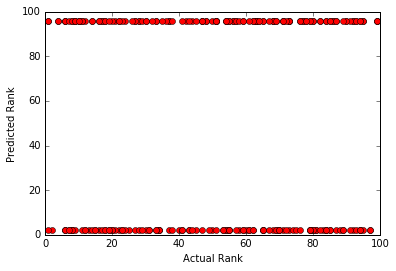

In [32]:
#print expected
plt.plot(actual,expected,'ro')
plt.axis([0,100,0,100])
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.show
count = 0
for q in difference:
    if q == 0:
        count += 1
print "Accuracy of Predictions: ", (float(count)/float(len(difference)))*100, "%"

Well, that's not useful, although I am curious why it only predicts 2 and 96 as ranks. Hm.

#### Liveness

/usr/lib/python2.7/dist-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


actual:  90.0 expected:  79.0
prediction was  -11.0  off
actual:  16.0 expected:  79.0
prediction was  63.0  off
actual:  27.0 expected:  79.0
prediction was  52.0  off
actual:  68.0 expected:  79.0
prediction was  11.0  off
actual:  69.0 expected:  6.0
prediction was  -63.0  off
actual:  8.0 expected:  79.0
prediction was  71.0  off
actual:  62.0 expected:  6.0
prediction was  -56.0  off
actual:  50.0 expected:  79.0
prediction was  29.0  off
actual:  91.0 expected:  6.0
prediction was  -85.0  off
actual:  99.0 expected:  6.0
prediction was  -93.0  off
actual:  99.0 expected:  6.0
prediction was  -93.0  off
actual:  8.0 expected:  6.0
prediction was  -2.0  off
actual:  19.0 expected:  6.0
prediction was  -13.0  off
actual:  38.0 expected:  79.0
prediction was  41.0  off
actual:  42.0 expected:  79.0
prediction was  37.0  off
actual:  10.0 expected:  79.0
prediction was  69.0  off
actual:  26.0 expected:  6.0
prediction was  -20.0  off
actual:  81.0 expected:  6.0
prediction was  -75.0

actual:  62.0 expected:  6.0
prediction was  -56.0  off
actual:  13.0 expected:  6.0
prediction was  -7.0  off
actual:  13.0 expected:  6.0
prediction was  -7.0  off
actual:  23.0 expected:  6.0
prediction was  -17.0  off
actual:  95.0 expected:  6.0
prediction was  -89.0  off
actual:  73.0 expected:  6.0
prediction was  -67.0  off
actual:  64.0 expected:  6.0
prediction was  -58.0  off
actual:  12.0 expected:  79.0
prediction was  67.0  off
actual:  8.0 expected:  79.0
prediction was  71.0  off
actual:  1.0 expected:  6.0
prediction was  5.0  off
actual:  91.0 expected:  79.0
prediction was  -12.0  off
actual:  88.0 expected:  6.0
prediction was  -82.0  off
actual:  28.0 expected:  6.0
prediction was  -22.0  off
actual:  74.0 expected:  6.0
prediction was  -68.0  off
actual:  52.0 expected:  6.0
prediction was  -46.0  off
actual:  77.0 expected:  79.0
prediction was  2.0  off
actual:  8.0 expected:  79.0
prediction was  71.0  off
actual:  70.0 expected:  6.0
prediction was  -64.0  off

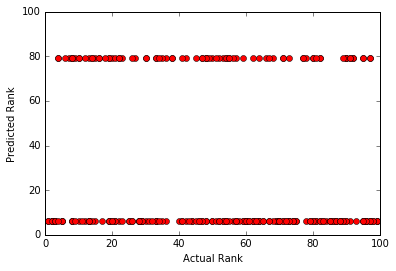

In [34]:
x = pd.DataFrame(data=d1, columns=["liveness"]) 
y = pd.DataFrame(data=d1, columns=["rank"]) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = BernoulliNB(binarize=[0.177648])
clf.fit(x_train, y_train)
#print "x_test.size = ", x_test.size
#print "y_test.size = ", y_test.size
#print len(x_test)
actual = list()
expected = list()
difference = list()
for idx in range(len(x_test)):
#for idx in range(x_test.size):
    #print idx
    actual.append(y_test.iloc[idx][0])
    expected.append(clf.predict(x_test[idx:idx+1])[0])
    difference.append(clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0])
    print "actual: ", y_test.iloc[idx][0], "expected: ", clf.predict(x_test[idx:idx+1])[0]
    print "prediction was ", (clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0]), " off"
#print expected
plt.plot(actual,expected,'ro')
plt.axis([0,100,0,100])
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.show
count = 0
for q in difference:
    if q == 0:
        count += 1
print "Accuracy of Predictions: ", (float(count)/float(len(difference)))*100, "%"

And it seems the same issue has reared its ugly head. I could (and might) keep trying each feature one at a time, but let's see if we can find combinations of features that might go together.

#### Energy, Liveness, Danceability

/usr/lib/python2.7/dist-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


actual:  84.0 expected:  6.0
prediction was  -78.0  off
actual:  24.0 expected:  4.0
prediction was  -20.0  off
actual:  60.0 expected:  6.0
prediction was  -54.0  off
actual:  17.0 expected:  4.0
prediction was  -13.0  off
actual:  51.0 expected:  1.0
prediction was  -50.0  off
actual:  73.0 expected:  50.0
prediction was  -23.0  off
actual:  89.0 expected:  1.0
prediction was  -88.0  off
actual:  8.0 expected:  4.0
prediction was  -4.0  off
actual:  22.0 expected:  50.0
prediction was  28.0  off
actual:  1.0 expected:  6.0
prediction was  5.0  off
actual:  37.0 expected:  53.0
prediction was  16.0  off
actual:  94.0 expected:  50.0
prediction was  -44.0  off
actual:  94.0 expected:  1.0
prediction was  -93.0  off
actual:  54.0 expected:  53.0
prediction was  -1.0  off
actual:  91.0 expected:  73.0
prediction was  -18.0  off
actual:  96.0 expected:  99.0
prediction was  3.0  off
actual:  52.0 expected:  99.0
prediction was  47.0  off
actual:  14.0 expected:  53.0
prediction was  39.0 

actual:  35.0 expected:  6.0
prediction was  -29.0  off
actual:  7.0 expected:  1.0
prediction was  -6.0  off
actual:  78.0 expected:  99.0
prediction was  21.0  off
actual:  96.0 expected:  6.0
prediction was  -90.0  off
actual:  29.0 expected:  53.0
prediction was  24.0  off
actual:  54.0 expected:  73.0
prediction was  19.0  off
actual:  31.0 expected:  4.0
prediction was  -27.0  off
actual:  86.0 expected:  6.0
prediction was  -80.0  off
actual:  1.0 expected:  1.0
prediction was  0.0  off
actual:  33.0 expected:  1.0
prediction was  -32.0  off
actual:  69.0 expected:  50.0
prediction was  -19.0  off
actual:  100.0 expected:  99.0
prediction was  -1.0  off
actual:  35.0 expected:  50.0
prediction was  15.0  off
actual:  3.0 expected:  53.0
prediction was  50.0  off
actual:  48.0 expected:  1.0
prediction was  -47.0  off
actual:  17.0 expected:  1.0
prediction was  -16.0  off
actual:  37.0 expected:  4.0
prediction was  -33.0  off
actual:  50.0 expected:  99.0
prediction was  49.0  

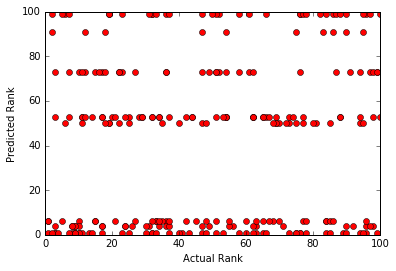

In [35]:
x = pd.DataFrame(data=d1, columns=["energy", "liveness", "danceability"]) 
y = pd.DataFrame(data=d1, columns=["rank"]) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = BernoulliNB(binarize=[0.690180, 0.177648, 0.650279])
clf.fit(x_train, y_train)
#print "x_test.size = ", x_test.size
#print "y_test.size = ", y_test.size
#print len(x_test)
actual = list()
expected = list()
difference = list()
for idx in range(len(x_test)):
#for idx in range(x_test.size):
    #print idx
    actual.append(y_test.iloc[idx][0])
    expected.append(clf.predict(x_test[idx:idx+1])[0])
    difference.append(clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0])
    print "actual: ", y_test.iloc[idx][0], "expected: ", clf.predict(x_test[idx:idx+1])[0]
    print "prediction was ", (clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0]), " off"
#print expected
plt.plot(actual,expected,'ro')
plt.axis([0,100,0,100])
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.show
count = 0
for q in difference:
    if q == 0:
        count += 1
print "Accuracy of Predictions: ", (float(count)/float(len(difference)))*100, "%"

Guess not. 

#### Tempo, Danceability, Valence

/usr/lib/python2.7/dist-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


actual:  10.0 expected:  37.0
prediction was  27.0  off
actual:  33.0 expected:  58.0
prediction was  25.0  off
actual:  19.0 expected:  96.0
prediction was  77.0  off
actual:  1.0 expected:  87.0
prediction was  86.0  off
actual:  69.0 expected:  87.0
prediction was  18.0  off
actual:  71.0 expected:  3.0
prediction was  -68.0  off
actual:  65.0 expected:  3.0
prediction was  -62.0  off
actual:  17.0 expected:  37.0
prediction was  20.0  off
actual:  63.0 expected:  95.0
prediction was  32.0  off
actual:  74.0 expected:  37.0
prediction was  -37.0  off
actual:  51.0 expected:  87.0
prediction was  36.0  off
actual:  83.0 expected:  26.0
prediction was  -57.0  off
actual:  78.0 expected:  87.0
prediction was  9.0  off
actual:  91.0 expected:  96.0
prediction was  5.0  off
actual:  1.0 expected:  3.0
prediction was  2.0  off
actual:  72.0 expected:  87.0
prediction was  15.0  off
actual:  97.0 expected:  58.0
prediction was  -39.0  off
actual:  62.0 expected:  84.0
prediction was  22.0 

actual:  16.0 expected:  37.0
prediction was  21.0  off
actual:  1.0 expected:  37.0
prediction was  36.0  off
actual:  12.0 expected:  26.0
prediction was  14.0  off
actual:  2.0 expected:  96.0
prediction was  94.0  off
actual:  60.0 expected:  3.0
prediction was  -57.0  off
actual:  65.0 expected:  95.0
prediction was  30.0  off
actual:  24.0 expected:  87.0
prediction was  63.0  off
actual:  85.0 expected:  3.0
prediction was  -82.0  off
actual:  94.0 expected:  87.0
prediction was  -7.0  off
actual:  90.0 expected:  87.0
prediction was  -3.0  off
actual:  36.0 expected:  58.0
prediction was  22.0  off
actual:  16.0 expected:  37.0
prediction was  21.0  off
actual:  4.0 expected:  37.0
prediction was  33.0  off
actual:  17.0 expected:  84.0
prediction was  67.0  off
actual:  15.0 expected:  96.0
prediction was  81.0  off
actual:  29.0 expected:  3.0
prediction was  -26.0  off
actual:  65.0 expected:  3.0
prediction was  -62.0  off
actual:  34.0 expected:  96.0
prediction was  62.0 

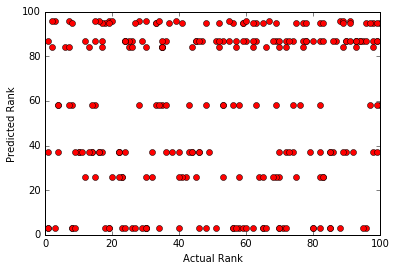

In [36]:
x = pd.DataFrame(data=d1, columns=["tempo", "danceability", "valence"]) 
y = pd.DataFrame(data=d1, columns=["rank"]) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = BernoulliNB(binarize=[120.143451, 0.650279, 0.545966])
clf.fit(x_train, y_train)
#print "x_test.size = ", x_test.size
#print "y_test.size = ", y_test.size
#print len(x_test)
actual = list()
expected = list()
difference = list()
for idx in range(len(x_test)):
#for idx in range(x_test.size):
    #print idx
    actual.append(y_test.iloc[idx][0])
    expected.append(clf.predict(x_test[idx:idx+1])[0])
    difference.append(clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0])
    print "actual: ", y_test.iloc[idx][0], "expected: ", clf.predict(x_test[idx:idx+1])[0]
    print "prediction was ", (clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0]), " off"
#print expected
plt.plot(actual,expected,'ro')
plt.axis([0,100,0,100])
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.show
count = 0
for q in difference:
    if q == 0:
        count += 1
print "Accuracy of Predictions: ", (float(count)/float(len(difference)))*100, "%"

Well then. I don't quite understand why the predictions are so stratified. How about...

#### Speechiness, Acousticness, Instrumentalness

/usr/lib/python2.7/dist-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


actual:  53.0 expected:  96.0
prediction was  43.0  off
actual:  41.0 expected:  98.0
prediction was  57.0  off
actual:  65.0 expected:  96.0
prediction was  31.0  off
actual:  3.0 expected:  98.0
prediction was  95.0  off
actual:  10.0 expected:  38.0
prediction was  28.0  off
actual:  48.0 expected:  96.0
prediction was  48.0  off
actual:  27.0 expected:  59.0
prediction was  32.0  off
actual:  29.0 expected:  96.0
prediction was  67.0  off
actual:  66.0 expected:  96.0
prediction was  30.0  off
actual:  100.0 expected:  96.0
prediction was  -4.0  off
actual:  15.0 expected:  38.0
prediction was  23.0  off
actual:  99.0 expected:  59.0
prediction was  -40.0  off
actual:  78.0 expected:  98.0
prediction was  20.0  off
actual:  92.0 expected:  85.0
prediction was  -7.0  off
actual:  77.0 expected:  96.0
prediction was  19.0  off
actual:  71.0 expected:  98.0
prediction was  27.0  off
actual:  17.0 expected:  85.0
prediction was  68.0  off
actual:  92.0 expected:  38.0
prediction was  -

actual:  88.0 expected:  85.0
prediction was  -3.0  off
actual:  91.0 expected:  96.0
prediction was  5.0  off
actual:  8.0 expected:  85.0
prediction was  77.0  off
actual:  17.0 expected:  96.0
prediction was  79.0  off
actual:  92.0 expected:  98.0
prediction was  6.0  off
actual:  70.0 expected:  98.0
prediction was  28.0  off
actual:  69.0 expected:  96.0
prediction was  27.0  off
actual:  65.0 expected:  98.0
prediction was  33.0  off
actual:  34.0 expected:  98.0
prediction was  64.0  off
actual:  28.0 expected:  98.0
prediction was  70.0  off
actual:  31.0 expected:  85.0
prediction was  54.0  off
actual:  48.0 expected:  96.0
prediction was  48.0  off
actual:  13.0 expected:  96.0
prediction was  83.0  off
actual:  31.0 expected:  98.0
prediction was  67.0  off
actual:  91.0 expected:  96.0
prediction was  5.0  off
actual:  34.0 expected:  96.0
prediction was  62.0  off
actual:  21.0 expected:  96.0
prediction was  75.0  off
actual:  59.0 expected:  96.0
prediction was  37.0  

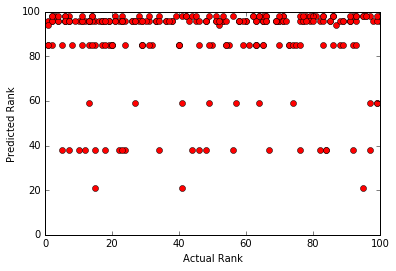

In [37]:
x = pd.DataFrame(data=d1, columns=["speechiness", "acousticness", "instrumentalness"]) 
y = pd.DataFrame(data=d1, columns=["rank"]) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = BernoulliNB(binarize=[0.102686, 0.157085, 0.011261])
clf.fit(x_train, y_train)
#print "x_test.size = ", x_test.size
#print "y_test.size = ", y_test.size
#print len(x_test)
actual = list()
expected = list()
difference = list()
for idx in range(len(x_test)):
#for idx in range(x_test.size):
    #print idx
    actual.append(y_test.iloc[idx][0])
    expected.append(clf.predict(x_test[idx:idx+1])[0])
    difference.append(clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0])
    print "actual: ", y_test.iloc[idx][0], "expected: ", clf.predict(x_test[idx:idx+1])[0]
    print "prediction was ", (clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0]), " off"
#print expected
plt.plot(actual,expected,'ro')
plt.axis([0,100,0,100])
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.show
count = 0
for q in difference:
    if q == 0:
        count += 1
print "Accuracy of Predictions: ", (float(count)/float(len(difference)))*100, "%"

Apparently it thinks these features indicate a low rank??? One final test:

#### Energy, Liveness, Tempo, Danceability, Valence

/usr/lib/python2.7/dist-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


actual:  84.0 expected:  73.0
prediction was  -11.0  off
actual:  79.0 expected:  35.0
prediction was  -44.0  off
actual:  26.0 expected:  87.0
prediction was  61.0  off
actual:  73.0 expected:  30.0
prediction was  -43.0  off
actual:  18.0 expected:  3.0
prediction was  -15.0  off
actual:  37.0 expected:  33.0
prediction was  -4.0  off
actual:  82.0 expected:  89.0
prediction was  7.0  off
actual:  50.0 expected:  3.0
prediction was  -47.0  off
actual:  30.0 expected:  49.0
prediction was  19.0  off
actual:  100.0 expected:  35.0
prediction was  -65.0  off
actual:  34.0 expected:  36.0
prediction was  2.0  off
actual:  50.0 expected:  1.0
prediction was  -49.0  off
actual:  82.0 expected:  3.0
prediction was  -79.0  off
actual:  12.0 expected:  43.0
prediction was  31.0  off
actual:  42.0 expected:  87.0
prediction was  45.0  off
actual:  100.0 expected:  76.0
prediction was  -24.0  off
actual:  71.0 expected:  73.0
prediction was  2.0  off
actual:  4.0 expected:  58.0
prediction was 

prediction was  -15.0  off
actual:  40.0 expected:  43.0
prediction was  3.0  off
actual:  94.0 expected:  23.0
prediction was  -71.0  off
actual:  34.0 expected:  53.0
prediction was  19.0  off
actual:  4.0 expected:  1.0
prediction was  -3.0  off
actual:  97.0 expected:  30.0
prediction was  -67.0  off
actual:  57.0 expected:  96.0
prediction was  39.0  off
actual:  38.0 expected:  19.0
prediction was  -19.0  off
actual:  88.0 expected:  53.0
prediction was  -35.0  off
actual:  19.0 expected:  76.0
prediction was  57.0  off
actual:  38.0 expected:  53.0
prediction was  15.0  off
actual:  46.0 expected:  22.0
prediction was  -24.0  off
actual:  7.0 expected:  3.0
prediction was  -4.0  off
actual:  52.0 expected:  53.0
prediction was  1.0  off
actual:  80.0 expected:  100.0
prediction was  20.0  off
actual:  59.0 expected:  19.0
prediction was  -40.0  off
actual:  39.0 expected:  95.0
prediction was  56.0  off
actual:  10.0 expected:  89.0
prediction was  79.0  off
actual:  53.0 expect

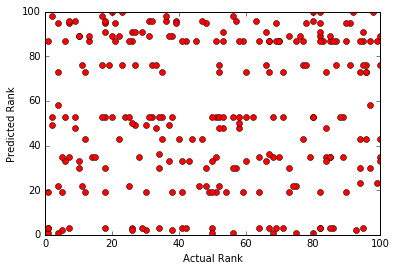

In [38]:
x = pd.DataFrame(data=d1, columns=["energy", "liveness", "tempo", "danceability", "valence"]) 
y = pd.DataFrame(data=d1, columns=["rank"]) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = BernoulliNB(binarize=[0.690180, 0.177648, 120.143451, 0.650279, 0.545966])
clf.fit(x_train, y_train)
#print "x_test.size = ", x_test.size
#print "y_test.size = ", y_test.size
#print len(x_test)
actual = list()
expected = list()
difference = list()
for idx in range(len(x_test)):
#for idx in range(x_test.size):
    #print idx
    actual.append(y_test.iloc[idx][0])
    expected.append(clf.predict(x_test[idx:idx+1])[0])
    difference.append(clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0])
    print "actual: ", y_test.iloc[idx][0], "expected: ", clf.predict(x_test[idx:idx+1])[0]
    print "prediction was ", (clf.predict(x_test[idx:idx+1])[0]-y_test.iloc[idx][0]), " off"
#print expected
plt.plot(actual,expected,'ro')
plt.axis([0,100,0,100])
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.show
count = 0
for q in difference:
    if q == 0:
        count += 1
print "Accuracy of Predictions: ", (float(count)/float(len(difference)))*100, "%"

Still pretty bad. Granted, I only checked for dead-on accuracy. At a glance, the accuracy for this and the full test might be somewhat better if a leeway of +- 10 rank was given, but as it stands, I can't say that we can predict rank using these audio features, at least not with NaiveBayes or kNN.